# Fase 0: Investigação da Fonte de Dados - Yahoo Finance
Este notebook documenta a investigação e validação da biblioteca yfinance como fonte de dados para o projeto de previsão do IBOVESPA. O objetivo é analisar a confiabilidade, qualidade e características dos dados para embasar as decisões de design do pipeline.

## 1. Análise de Acesso e Limites de Uso

A investigação sobre o acesso aos dados do Yahoo Finance revela que a API oficial foi descontinuada em 2017. Portanto, o acesso através de bibliotecas como 

yfinance é feito por meios não-oficiais, como web scraping do site.

Esta abordagem não-oficial impõe as seguintes considerações sobre acesso e limites:


Limites de Uso (Rate Limiting): Por não haver uma API oficial, não há garantia de estabilidade. Os métodos de acesso não-oficiais podem estar sujeitos a limitação de frequência (rate limiting) ou até mesmo ao bloqueio de IP por parte do Yahoo, caso o uso seja percebido como excessivo ou programático.


Termos de Serviço (ToS): É fundamental que os desenvolvedores estejam cientes e respeitem os Termos de Serviço do Yahoo. Devem ser evitadas atividades que violem as políticas da empresa, como o uso de dados para fins proibidos ou tentativas de contornar as medidas de segurança existentes.

Conclusão para o nosso projeto: Para os fins educacionais deste projeto, o risco de bloqueio é baixo, dado nosso volume de requisições. No entanto, é imprescindível estar ciente da natureza não-oficial do acesso e da necessidade de usar os dados de forma ética e em conformidade com os termos da plataforma.



In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Configuração para melhorar a visualização dos gráficos
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Análise da Qualidade dos Dados
### Análise 2.1: Preço Nominal
**Observação:**
O gráfico de "Preço de Fechamento Histórico para PETR4.SA" foi gerado com sucesso utilizando apenas a coluna `Close`. A tentativa de acessar a coluna `Adj Close` resultou em um `KeyError`, confirmando que ela não é mais retornada por padrão pela biblioteca `yfinance`. Isso ocorre porque o argumento `auto_adjust=True` (padrão) já ajusta todas as colunas de preço (Open, High, Low, Close) para eventos como dividendos e desdobramentos.

C:\Users\Carlo\AppData\Local\Temp\ipykernel_2764\1024673635.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  petrobras_df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Buscando dados para PETR4.SA...
Dados baixados com sucesso!


<Figure size 1400x700 with 0 Axes>

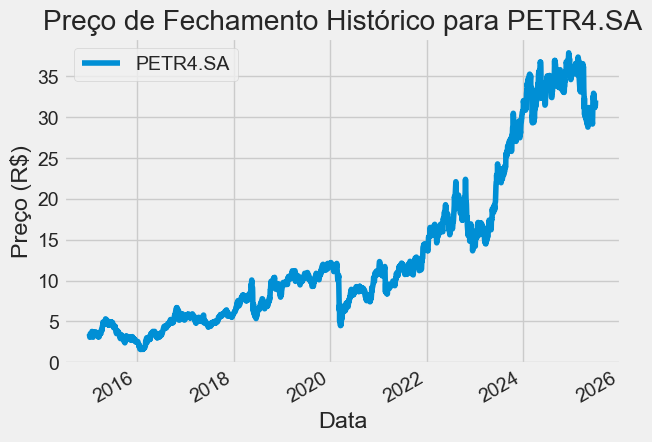

Price,Close,High,Low,Open,Volume
Ticker,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA,PETR4.SA
Date,,,,,
2025-06-26,31.459999,31.600000,31.309999,31.350000,17227000
2025-06-27,31.209999,31.450001,31.139999,31.389999,16482100
2025-06-30,31.379999,31.490000,31.100000,31.209999,23091100
2025-07-01,31.490000,31.570000,31.260000,31.450001,17014100
2025-07-02,32.049999,32.240002,31.480000,31.580000,28311600


In [15]:
ticker = 'PETR4.SA'
start_date = '2015-01-01'
end_date = '2025-07-03'

print(f"Buscando dados para {ticker}...")
petrobras_df = yf.download(ticker, start=start_date, end=end_date)
print("Dados baixados com sucesso!")


# 3. Plotar APENAS a coluna 'Close', que foi baixada com sucesso
plt.figure(figsize=(14, 7))

# Esta linha funciona, pois a coluna 'Close' existe.
# O pandas é inteligente o suficiente para encontrá-la mesmo no MultiIndex.
petrobras_df['Close'].plot(label='Preço de Fechamento (Ajustado por padrão)')

# A linha abaixo foi removida pois a coluna 'Adj Close' não existe mais no DataFrame retornado
# petrobras_df['Adj Close'].plot(label='Preço de Fechamento (Ajustado)')

plt.title(f'Preço de Fechamento Histórico para {ticker}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.show()

# 4. Exibir as últimas linhas para ver os valores
display(petrobras_df.tail())


**Decisão Estratégica:**
Para os objetivos deste projeto, a coluna **`Close`** será utilizada como a fonte primária para o preço de fechamento, pois ela já contém os dados ajustados necessários para uma análise de tendência consistente.

### Análise 2.2: Integridade de Dados Históricos

Para avaliar a qualidade e a completude dos dados a longo prazo, foi realizado o download de todo o histórico do índice `^BVSP` desde o ano 2000.

--- Buscando dados de longo prazo para ^BVSP ---


C:\Users\Carlo\AppData\Local\Temp\ipykernel_26708\1359723623.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bvsp_long_df = yf.download(ticker_bvsp, start=start_date_long, end=end_date_long, progress=False)


Dados baixados.

--- Informações do DataFrame (.info()) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6316 entries, 2000-01-03 to 2025-07-03
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^BVSP)   6316 non-null   float64
 1   (High, ^BVSP)    6316 non-null   float64
 2   (Low, ^BVSP)     6316 non-null   float64
 3   (Open, ^BVSP)    6316 non-null   float64
 4   (Volume, ^BVSP)  6316 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 296.1 KB

--- Contagem de Dados Faltantes por Coluna (.isnull().sum()) ---
Series([], dtype: int64)

--- Plotando a Série Temporal Completa do Fechamento ---


<Figure size 1500x700 with 0 Axes>

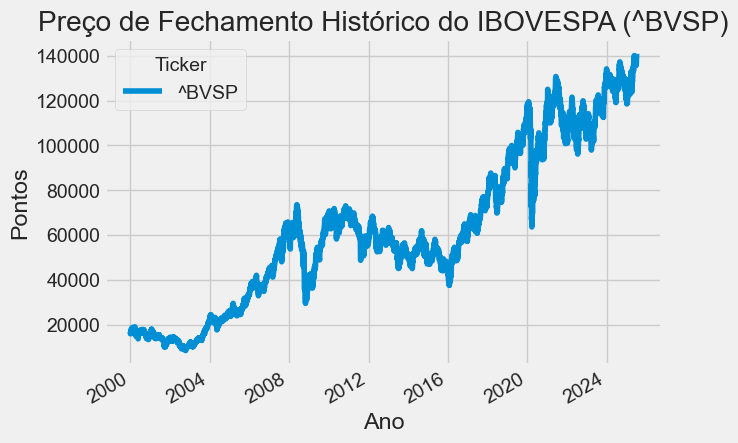

Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2025-06-27,136866.0,137209.0,136469.0,137113.0,6244500
2025-06-30,138855.0,139103.0,136430.0,136865.0,7680300
2025-07-01,139549.0,139695.0,138855.0,138855.0,6345700
2025-07-02,139051.0,140049.0,138384.0,139586.0,8811900
2025-07-03,140928.0,141304.0,139051.0,139051.0,6082200


In [6]:
# 1. Definir parâmetros para a análise de longo prazo
ticker_bvsp = '^BVSP'
# Puxando dados desde o início dos anos 2000 para uma visão ampla
start_date_long = '2000-01-01'
# Usando a data atual para pegar o histórico mais completo possível
end_date_long = '2025-07-04' 

# 2. Baixar os dados
print(f"--- Buscando dados de longo prazo para {ticker_bvsp} ---")
bvsp_long_df = yf.download(ticker_bvsp, start=start_date_long, end=end_date_long, progress=False)
print("Dados baixados.")

# 3. Executar .info() para uma visão geral da estrutura e preenchimento do DataFrame
print("\n--- Informações do DataFrame (.info()) ---")
# O .info() já imprime o resultado diretamente, então o colocamos dentro de um print para organização
bvsp_long_df.info()

# 4. Executar .isnull().sum() para quantificar dados faltantes por coluna
print("\n--- Contagem de Dados Faltantes por Coluna (.isnull().sum()) ---")
missing_data = bvsp_long_df.isnull().sum()
# Filtramos para mostrar apenas as colunas que de fato têm dados faltantes
print(missing_data[missing_data > 0])

# 5. Plotar a série temporal completa para inspeção visual de anomalias
print("\n--- Plotando a Série Temporal Completa do Fechamento ---")
if not bvsp_long_df.empty:
    plt.figure(figsize=(15, 7))
    bvsp_long_df['Close'].plot(title='Preço de Fechamento Histórico do IBOVESPA (^BVSP)')
    plt.xlabel('Ano')
    plt.ylabel('Pontos')
    plt.show()
else:
    print("DataFrame está vazio. Não é possível plotar o gráfico.")

display(bvsp_long_df.tail())

**Observações:**
* A análise com os métodos `.info()` e `.isnull().sum()` revelou um resultado excelente: **não foram encontrados valores nulos (`NaN`)** no conjunto de dados para o período solicitado. A API do `yfinance` já fornece uma série contínua contendo apenas os dias em que houve pregão.
* A inspeção visual do gráfico da série temporal completa não apontou anomalias, picos ou vales que pudessem sugerir erros de dados. A evolução dos preços é consistente com os principais eventos macroeconômicos do período.

**Conclusão:** A fonte de dados para o `^BVSP` é considerada de alta qualidade e integridade, não exigindo um tratamento complexo de dados faltantes para a análise deste único ativo.

### Análise 2.3: Tratamento de Dados de Múltiplos Mercados (Feriados)
**Observação:**
Foi realizada uma análise comparativa entre o `^BVSP` (Brasil) e o `^GSPC` (EUA) durante o feriado de Ação de Graças de 2024. O resultado mostra que a API retorna um valor `NaN` para o `^GSPC` no dia do feriado, enquanto o `^BVSP` apresenta um valor de fechamento normal.

In [5]:
# 1. Definir os tickers dos mercados que queremos comparar
tickers_mercados = ['^BVSP', '^GSPC'] # IBOVESPA e S&P 500

# 2. Definir a data de um feriado importante nos EUA (Thanksgiving 2024)
data_do_feriado_eua = '2024-11-28'

# 3. Baixar os dados para um pequeno intervalo ao redor desta data
print(f"--- Buscando dados para {tickers_mercados} ao redor de {data_do_feriado_eua} ---")
dados_feriado = yf.download(
    tickers_mercados,
    start='2024-11-27', # Pegando um dia antes e um depois para contexto
    end='2024-11-30',
    progress=False
)
print("Dados baixados.")

# 4. Selecionar e exibir apenas a linha do dia do feriado
# Vamos focar apenas nos preços de fechamento ('Close') para maior clareza
print(f"\n--- Exibindo preços de fechamento para a data do feriado ({data_do_feriado_eua}) ---")

# Acessa primeiro o nível da coluna 'Close' e depois localiza a linha pela data
dados_do_dia = dados_feriado['Close'].loc[data_do_feriado_eua]

# Imprime o resultado
print(dados_do_dia)


--- Buscando dados para ['^BVSP', '^GSPC'] ao redor de 2024-11-28 ---


C:\Users\Carlo\AppData\Local\Temp\ipykernel_26708\1480402567.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_feriado = yf.download(


Dados baixados.

--- Exibindo preços de fechamento para a data do feriado (2024-11-28) ---
Ticker
^BVSP    124610.0
^GSPC         NaN
Name: 2024-11-28 00:00:00, dtype: float64


**Conclusão Estratégica:**
Esta análise valida a necessidade de uma estratégia de tratamento de dados ausentes no nosso pipeline final. Para garantir um dataset coeso e sem falhas, o método **forward-fill (`ffill`)** será implementado na Fase 1. Ele preencherá os dados ausentes de um ativo em um dia de feriado com o último valor válido conhecido, assumindo que o preço não mudou, pois o mercado estava fechado.

### 3. Conclusão e Decisão Final
Veredito: GO. A fonte de dados yfinance é considerada adequada para os objetivos deste projeto, com as ressalvas e decisões de design listadas abaixo
* A coluna Close será utilizada, pois já reflete os preços ajustados por padrão nas versões recentes da biblioteca.
* A estratégia de preenchimento ffill é obrigatória para harmonizar os dados de diferentes mercados.
* A API possui limites de uso não oficiais; o pipeline deve ser projetado para fazer requisições de forma consciente.